In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import Ko

In [2]:
raw_per = pd.read_csv('../Data/ALL/Monthly/ALL_PER_MONTHLY.csv', encoding = 'cp949', header = 7, dtype = 'str')
raw_rt = pd.read_csv('../Data/ALL/Monthly/ALL_SILH_SUIK_RT_MONTHLY_NO_DIVIDEND.csv', encoding = 'cp949', header = 7, dtype = 'str')

In [3]:
raw_per.head(7)

,Term,19900101,Current(20180914),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 5002,Unnamed: 5003,Unnamed: 5004,Unnamed: 5005,Unnamed: 5006,Unnamed: 5007,Unnamed: 5008,Unnamed: 5009,Unnamed: 5010,Unnamed: 5011
0,Symbol,A000010,A000011,A000012,A000020,A000021,A000022,A000023,A000030,A000031,...,A900310,A950010,A950030,A950070,A950100,A950110,A950130,A950140,A950160,A950170
1,Symbol Name,조흥은행,조흥은행(1신),조흥은행(2신),동화약품,동화약품공업(1신),동화약품(전환1신),동화약품(전환2신),우리은행,한빛은행(1신),...,컬러레이,평산차업 KDR,네프로아이티,중국고섬,SBI모기지,SBI핀테크솔루션즈,엑세스바이오,잉글우드랩,코오롱티슈진(Reg.S),JTC
2,Kind,NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),...,NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C)
3,Item,6000701002,6000701002,6000701002,6000701002,6000701002,6000701002,6000701002,6000701002,6000701002,...,6000701002,6000701002,6000701002,6000701002,6000701002,6000701002,6000701002,6000701002,6000701002,6000701002
4,Item Name,수정PER(배),수정PER(배),수정PER(배),수정PER(배),수정PER(배),수정PER(배),수정PER(배),수정PER(배),수정PER(배),...,수정PER(배),수정PER(배),수정PER(배),수정PER(배),수정PER(배),수정PER(배),수정PER(배),수정PER(배),수정PER(배),수정PER(배)
5,Frequency,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,...,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL
6,1990-01-31,20.34,NaN,NaN,19.17,NaN,NaN,NaN,445.70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 성과지표 데이터프레임 전처리 수행

In [4]:
per_df = Ko.Preprocessing(raw_per, column = '심볼', drop_limit=24)

In [7]:
len(per_df)

2361

# 수익률 DF 전처리

In [8]:
rt_df = Ko.Preprocessing(raw_rt, column = '심볼', drop_limit=24).apply(lambda x: Ko.rt_transform(x))

rt_df = rt_df.loc[per_df.index]
rt_df = rt_df.iloc[:, :-1]

In [9]:
rt_df.head()

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20171130,20171231,20180131,20180228,20180331,20180430,20180531,20180630,20180731,20180831
A000010,0.9060,0.9407,0.9528,0.8512,1.1845,0.8607,1.0190,0.8458,0.9668,1.3143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000020,1.0695,0.9652,0.9279,0.8980,0.9734,0.8608,0.9161,1.0285,1.0138,1.0540,...,1.1652,0.9466,1.1077,1.0556,1.0746,0.9429,0.9913,0.8908,1.0833,1.0498
A000030,0.9000,0.9407,0.9528,0.8595,1.1827,0.8537,1.0190,0.8411,0.9778,1.3182,...,0.9878,0.9722,1.0698,0.9852,0.8825,1.0956,0.9533,1.0654,1.0368,0.9645
A000040,1.1000,0.9870,0.9474,0.8056,1.1552,0.7985,0.9533,0.8431,0.8488,1.3014,...,0.8586,0.9368,1.2924,0.8877,1.0285,1.1560,1.0825,0.8352,0.9701,1.0034
A000050,1.0000,1.0000,1.0000,0.9918,1.0146,1.0019,0.9918,1.0020,1.0023,0.9977,...,0.9381,1.0183,1.0432,0.9690,1.0000,1.0605,0.8758,1.0613,0.9206,1.0784


# 포트폴리오 구성 수행

In [10]:
data = Ko.portfolio_selection(per_df)

In [11]:
data.head(5)

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20171130,20171231,20180131,20180228,20180331,20180430,20180531,20180630,20180731,20180831
A000010,x,4,4,4,4,4,4,4,4,4,...,x,x,x,x,x,x,x,x,x,x
A000020,x,4,4,4,2,2,2,2,2,2,...,0,0,0,0,1,1,1,1,1,1
A000030,x,9,9,9,9,9,9,9,9,9,...,1,1,1,1,1,1,1,1,1,1
A000040,x,9,9,9,9,9,9,9,9,9,...,x,x,x,x,x,x,x,x,x,x
A000050,x,5,5,5,6,5,6,6,6,7,...,4,4,4,4,4,4,4,3,4,4


In [13]:
#data.to_csv('PER.csv')

# 포트폴리오 성과분석

In [14]:
result = Ko.performance_analysis(data, rt_df)
result.index = pd.to_datetime(data.columns, format = '%Y%m%d')

In [15]:
result.min()

GROUP_0    0.718092
GROUP_1    0.721394
GROUP_2    0.728869
GROUP_3    0.722686
GROUP_4    0.730072
GROUP_5    0.706744
GROUP_6    0.721576
GROUP_7    0.690905
GROUP_8    0.687115
GROUP_9    0.678988
dtype: float64

In [16]:
result.max()

GROUP_0    1.771873
GROUP_1    1.768481
GROUP_2    1.480152
GROUP_3    1.345691
GROUP_4    1.497740
GROUP_5    1.406541
GROUP_6    1.466675
GROUP_7    1.398670
GROUP_8    1.491287
GROUP_9    1.646474
dtype: float64

# 1990년대

Text(0.5,1,'Performance result by PER Group')

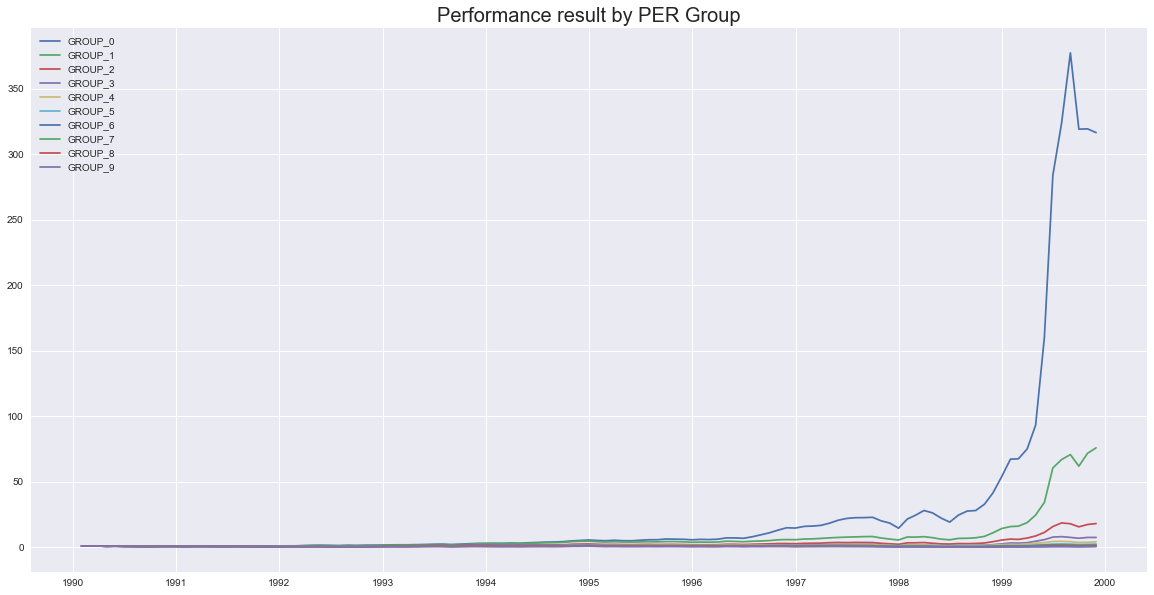

In [17]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[:119].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2000 년대

Text(0.5,1,'Performance result by PER Group')

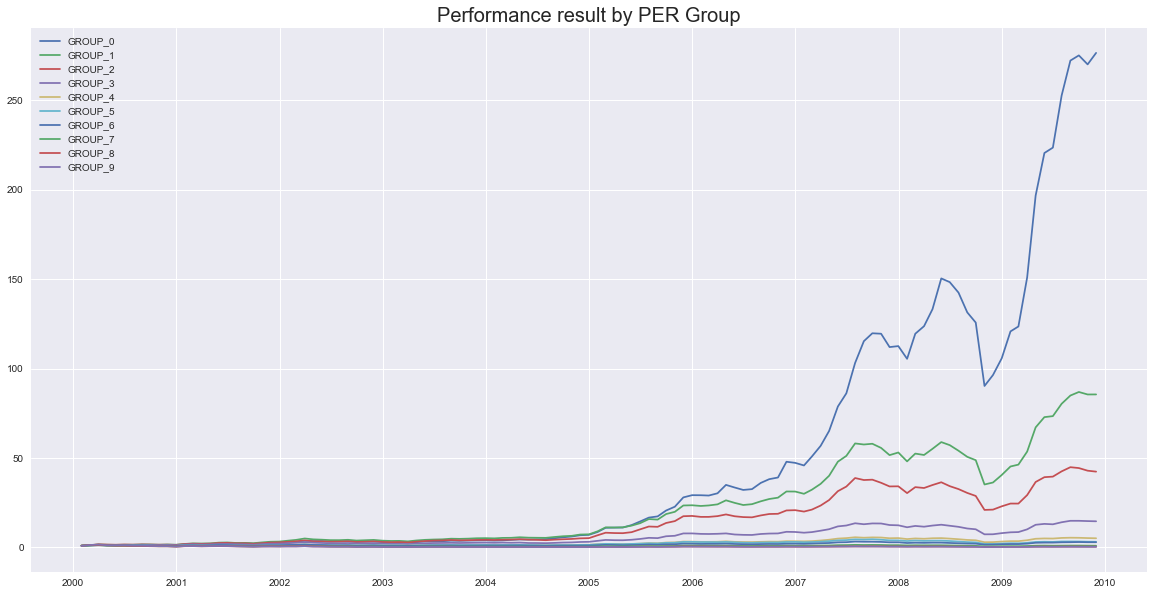

In [18]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[120:239].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2010년대

Text(0.5,1,'Performance result by PER Group')

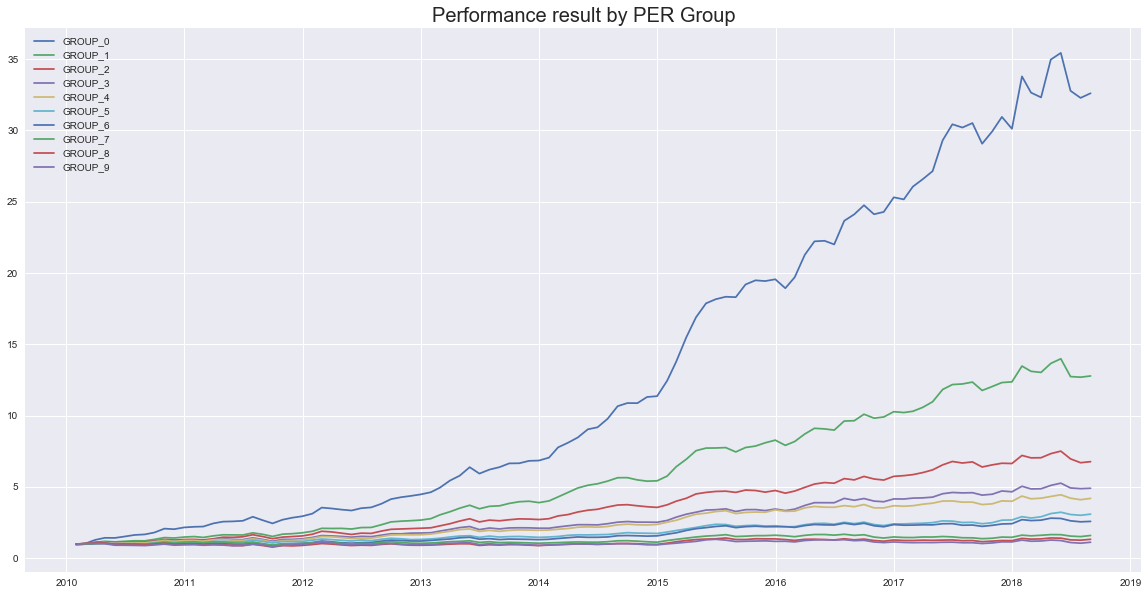

In [19]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[240:].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

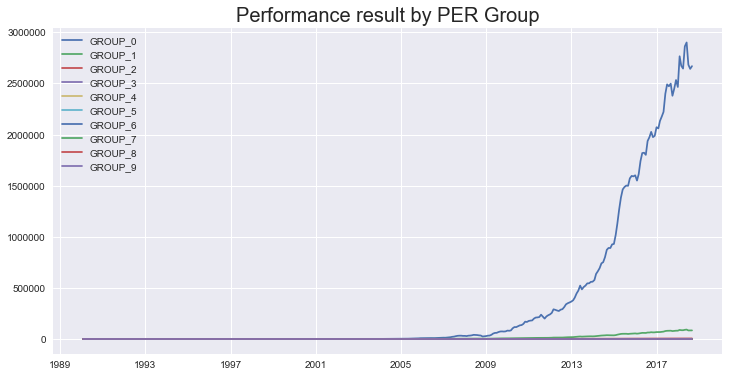

In [20]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

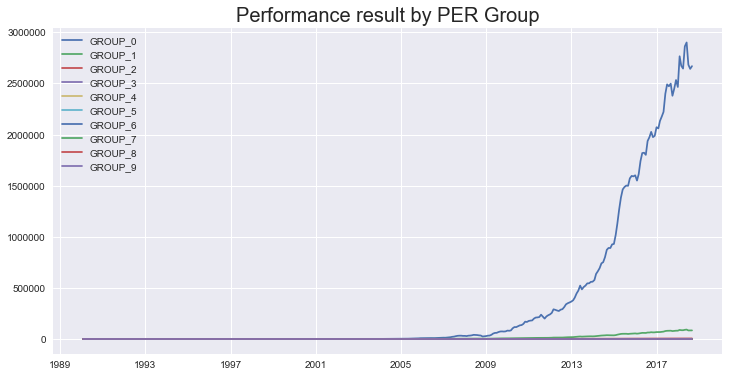

In [21]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Monthly return distribution by PER Group')

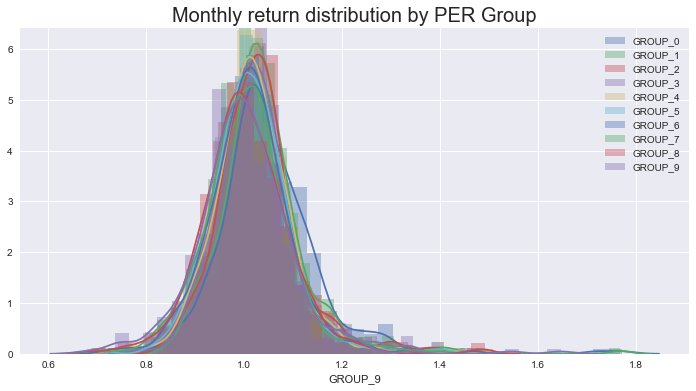

In [22]:
plt.figure(figsize = (12,6))

for column in result.columns:
    sns.distplot(result[column], label = column)

plt.legend(loc = 'best')
plt.title('Monthly return distribution by PER Group', fontsize = 20)

In [24]:
result.describe().apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
count,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000
mean,1.049,1.038,1.029,1.022,1.017,1.012,1.011,1.006,1.003,1.001
std,0.106,0.096,0.089,0.083,0.083,0.081,0.084,0.088,0.091,0.101
min,0.718,0.721,0.729,0.723,0.730,0.707,0.722,0.691,0.687,0.679
25%,0.994,0.989,0.977,0.972,0.968,0.964,0.965,0.956,0.953,0.949
50%,1.034,1.028,1.023,1.016,1.016,1.010,1.008,1.005,0.997,0.997
75%,1.097,1.074,1.064,1.062,1.059,1.057,1.057,1.049,1.051,1.052
max,1.772,1.768,1.480,1.346,1.498,1.407,1.467,1.399,1.491,1.646
